# Scraping a proper website (Basics-2)

1.Website   : https://coreyms.com/  <br>
2.Tutorial  : https://www.youtube.com/watch?v=ng2o98k983k


BeautifulSoup: Beautiful Soup is a Python package for parsing HTML and XML documents. It creates a parse tree for parsed pages that can be used to extract data from HTML, which is useful for web scraping. It is available for Python 2.7 and Python 3.

Requests (Library): Requests is a Python HTTP library, released under the Apache License 2.0. The goal of the project is to make HTTP requests simpler and more human-friendly.

In [1]:
from bs4 import BeautifulSoup
import requests

In [2]:
source = requests.get('https://coreyms.com/').text

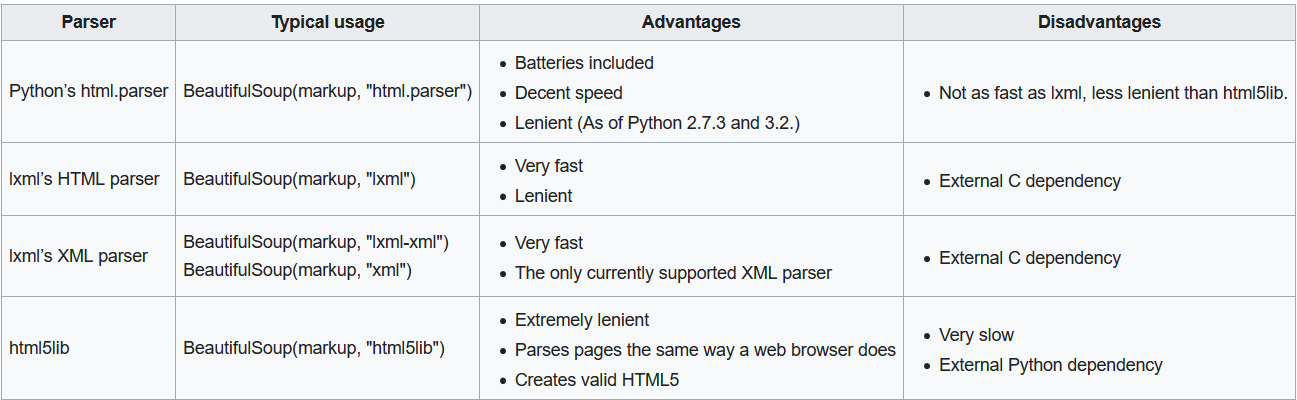

In [3]:
soup = BeautifulSoup(source, 'lxml')

# The below cell represents the entire HTML of the page used here:

"soup" is the variable representing the parsed HTML page's contents. The prettify() function is used to show the entire HTML 
page in a proper and readable format.

In [4]:
print(soup.prettify())

<!DOCTYPE html>
<html lang="en-US">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <!-- This site is optimized with the Yoast SEO plugin v14.1 - https://yoast.com/wordpress/plugins/seo/ -->
  <title>
   CoreyMS - Development, Design, DIY, and more
  </title>
  <meta content="Development, Design, DIY, and more" name="description"/>
  <meta content="index, follow" name="robots"/>
  <meta content="index, follow, max-snippet:-1, max-image-preview:large, max-video-preview:-1" name="googlebot"/>
  <meta content="index, follow, max-snippet:-1, max-image-preview:large, max-video-preview:-1" name="bingbot"/>
  <link href="https://coreyms.com/" rel="canonical"/>
  <link href="https://coreyms.com/page/2" rel="next"/>
  <meta content="en_US" property="og:locale"/>
  <meta content="website" property="og:type"/>
  <meta content="CoreyMS - Development, Design, DIY, and more" property="og:title"/>
  <meta content="Development, Design, DIY, a

# Extraction:

The contents that are being extracted here are the articles that have been displayed onto the website. The below image might help:

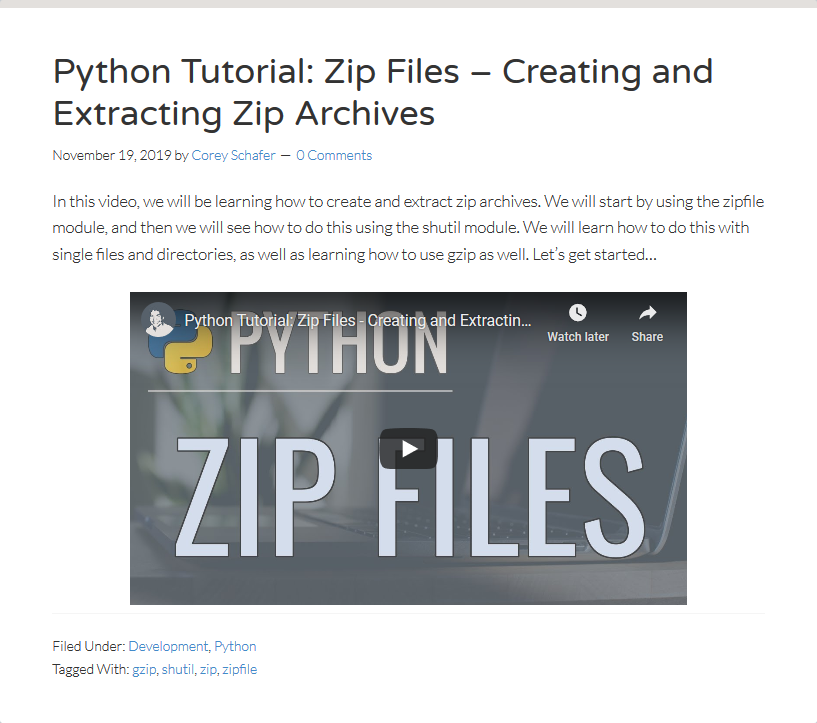

This is a single article. The contents that are going to be taken from a article is:
1. Headline
2. Summary
3. YouTube link to the video

In [5]:
article = soup.find('article')
print(article.prettify())

<article class="post-1670 post type-post status-publish format-standard has-post-thumbnail category-development category-python tag-gzip tag-shutil tag-zip tag-zipfile entry" itemscope="" itemtype="https://schema.org/CreativeWork">
 <header class="entry-header">
  <h2 class="entry-title" itemprop="headline">
   <a class="entry-title-link" href="https://coreyms.com/development/python/python-tutorial-zip-files-creating-and-extracting-zip-archives" rel="bookmark">
    Python Tutorial: Zip Files – Creating and Extracting Zip Archives
   </a>
  </h2>
  <p class="entry-meta">
   <time class="entry-time" datetime="2019-11-19T13:02:37-05:00" itemprop="datePublished">
    November 19, 2019
   </time>
   by
   <span class="entry-author" itemprop="author" itemscope="" itemtype="https://schema.org/Person">
    <a class="entry-author-link" href="https://coreyms.com/author/coreymschafer" itemprop="url" rel="author">
     <span class="entry-author-name" itemprop="name">
      Corey Schafer
     </spa

In [6]:
headline = article.h2.a.text

In [7]:
headline

'Python Tutorial: Zip Files – Creating and Extracting Zip Archives'

In [8]:
summary = article.find('div', class_='entry-content').p.text
print(summary)

In this video, we will be learning how to create and extract zip archives. We will start by using the zipfile module, and then we will see how to do this using the shutil module. We will learn how to do this with single files and directories, as well as learning how to use gzip as well. Let’s get started…


## YouTube Link:

The YouTube link that is attached or that is extracted from the webiste does not lead to a particular YouTube link, the webiste has a player that helps the video launch/play in the website itself. Every YouTube video has a unique ID assigned to it and this id can be seen in the URL of that video. The ID can be extrated here in order to go to the YouTube link of the video. For example:

vid_src is the source URL to the video that is in the website, it has the unique ID that is extracted from the URL and hence the standard YouTube URL is defined.

In [9]:
vid_src = article.find('iframe', class_='youtube-player')['src']
vid_id = vid_src.split('/')[4].split('?')[0]
print(vid_id)

z0gguhEmWiY


In [10]:
yt_link = f'http://youtube.com/watch?v={vid_id}'

In [11]:
yt_link

'http://youtube.com/watch?v=z0gguhEmWiY'

## Storing:

The contents extracted are then stored into a CSV file that has 3 columns namely: 
1. 'headline'
2. 'Summary'
3. 'Video Link'

The stored CSV file's name is : 'cms_scrape.csv'

## Exception Handling:

The's try-except block added while extracting these articles. The reason behind doing so is because there could be some articles that do not have a video link and the scraping tool might look for that particular link. For example:

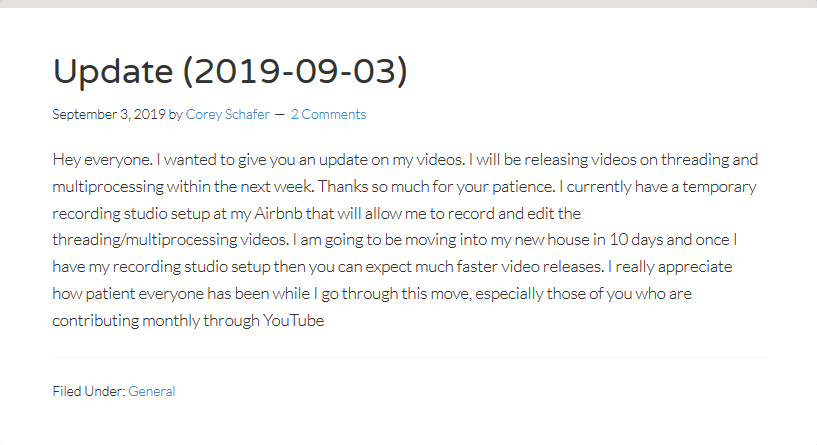

In [12]:
import csv

csv_file = open('cms_scrape.csv', 'w')

csv_writer = csv.writer(csv_file)

csv_writer.writerow(['headline', 'Summary', 'Video Link'])

for article in soup.find_all('article'):
    headline = article.h2.a.text
    summary = article.find('div', class_='entry-content').p.text
    
    print(headline)
    print(summary)
    try: 
        vid_src = article.find('iframe', class_='youtube-player')['src']
        vid_id = vid_src.split('/')[4].split('?')[0]
        yt_link = f'http://youtube.com/watch?v={vid_id}'
        
    except Exception as e:
        yt_link = None
        
    print(yt_link)
    print()
    csv_writer.writerow([headline, summary, yt_link])

csv_file.close()

Python Tutorial: Zip Files – Creating and Extracting Zip Archives
In this video, we will be learning how to create and extract zip archives. We will start by using the zipfile module, and then we will see how to do this using the shutil module. We will learn how to do this with single files and directories, as well as learning how to use gzip as well. Let’s get started…
http://youtube.com/watch?v=z0gguhEmWiY

Python Data Science Tutorial: Analyzing the 2019 Stack Overflow Developer Survey
In this Python Programming video, we will be learning how to download and analyze real-world data from the 2019 Stack Overflow Developer Survey. This is terrific practice for anyone getting into the data science field. We will learn different ways to analyze this data and also some best practices. Let’s get started…
http://youtube.com/watch?v=_P7X8tMplsw

Python Multiprocessing Tutorial: Run Code in Parallel Using the Multiprocessing Module
In this Python Programming video, we will be learning how to 